In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import json
import argparse
import cv2
import os
#from google.colab.patches import cv2_imshow

2022-12-14 13:16:09.228220: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-14 13:16:09.228274: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [14]:
home_path = os.path.dirname(os.getcwd())
imgs_path = os.path.join(home_path, 'images')

def get_img_path(file_path):
    return os.path.join(imgs_path, file_path)

## **Process Image and Predict Functions**

In [11]:
# process_image
def process_image(image):
    """
    Input:
    @image = Image to be processed in the form of a numpy array
    Return:
    @image = Image in the form of a numpy array with shape (224, 224, 3)
    """
    # 1. Convert to a TensorFlow tensor
    image_tf = tf.convert_to_tensor(image)
    # 2. Resize image with tf.image.resize
    image_resized = tf.image.resize(image_tf, [224, 224])
    # 3. Normalize: Divide pixel values by 255 to get floats in range [0, 1]
    image_resized /= 255
    # 4. Convert back to Numpy using .numpy()
    image_np = image_resized.numpy()
    return image_np

# predict
def predict(image_path, top_k=1):
    """
    Input:
    @image = Image to be classified
    @model = Model that will predict the output
    @top_k = The first top_k numbers of predicted classes
    Return:
    @probs(list) = The probabilities of the top_k predictions
    @classes(list) = The classes corresponding to the top_k predictions
    """
    classes = ['Can', 'Glass', 'HDPEM', 'PET']

    # 0. Load model
    keras_model = os.path.join(home_path, 'waste_detector_model.h5')
    model = tf.keras.models.load_model(keras_model,
                                       custom_objects = {
                                           'KerasLayer': hub.KerasLayer},
                                       compile=False)
    # 1. Load image given image_path using Image.open()
    image = Image.open(image_path)
    # 2. Convert image to numpy array np.asarray()
    image_np = np.asarray(image)
    # 3. process_image()
    image_processed = process_image(image_np)
    # 4. np.expand_dims() to add the extra dimension (1, 224, 224, 3)
    image = np.expand_dims(image_processed, axis = 0)
    # 5. Pass image to model
    predictions = model.predict(image)

    pred_list = list(predictions[0])
    max_pred = max(pred_list)
    predict_index = pred_list.index(max_pred)
    name = classes[predict_index]
    return name, max_pred*100

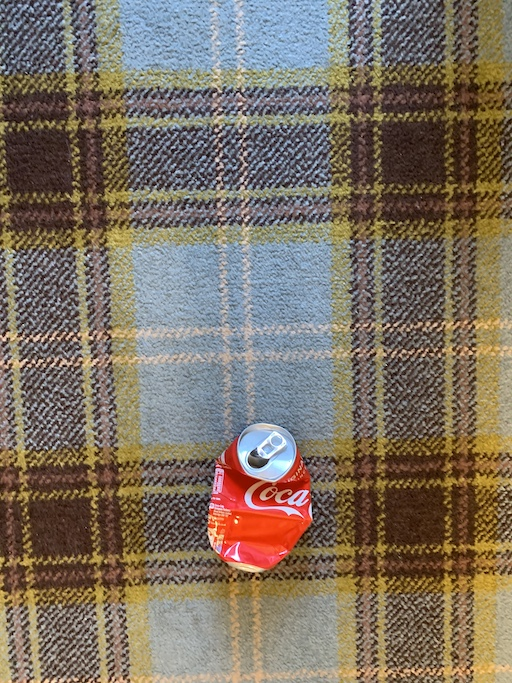

1/1 [==============================] - 0s 383ms/step


('Can', 99.99247789382935)

In [ ]:
img = cv2.imread(get_img_path('AluCan1,012.jpg'))
cv2.imshow(img)
predict(get_img_path('AluCan1,012.jpg'))

In [ ]:
predict(get_img_path('Glass1,061.JPG'))

1/1 [==============================] - 1s 609ms/step


array([[2.5827112e-03, 8.7352419e-01, 2.0562065e-05, 1.2387270e-01]],
      dtype=float32)

In [ ]:
predict(get_img_path('HDPEM585.JPG'))

1/1 [==============================] - 1s 1s/step


array([[4.5629797e-04, 1.1110062e-04, 9.9943143e-01, 1.2282363e-06]],
      dtype=float32)

In [ ]:
predict(get_img_path('PET1,087.jpg'))

1/1 [==============================] - 1s 600ms/step


array([[1.5187803e-01, 1.1889492e-03, 2.0762357e-04, 8.4672534e-01]],
      dtype=float32)

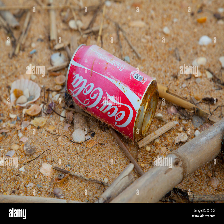

1/1 [==============================] - 0s 491ms/step


('Can', 98.53770136833191)

In [ ]:
img = cv2.imread(get_img_path('lata_basura.jpg'))
output = cv2.resize(img, (224, 224))
cv2.imshow(output)
predict(get_img_path('lata_basura.jpg'))

In [ ]:
predict(get_img_path('botella.jpeg'))

1/1 [==============================] - 1s 758ms/step


array([[5.0248086e-06, 1.7744737e-03, 4.0332350e-05, 9.9818015e-01]],
      dtype=float32)

In [ ]:
predict(get_img_path('lata_basura.jpg'))

1/1 [==============================] - 1s 722ms/step


array([[0.985377  , 0.00202412, 0.01074772, 0.00185119]], dtype=float32)

In [ ]:
predict(get_img_path('lata_playa.jpg'))

1/1 [==============================] - 1s 698ms/step


array([[9.9640733e-01, 4.6333793e-04, 2.8049021e-03, 3.2441737e-04]],
      dtype=float32)

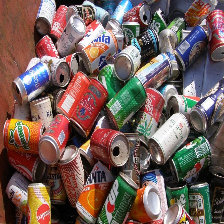

1/1 [==============================] - 0s 496ms/step


('Can', 88.65816593170166)

In [ ]:
img = cv2.imread(get_img_path('muchas_latas.jpg'))
output = cv2.resize(img, (224, 224))
cv2.imshow(output)
predict(get_img_path('muchas_latas.jpg'))

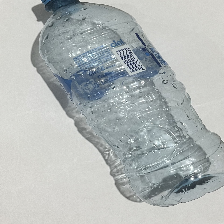

1/1 [==============================] - 0s 405ms/step


('PET', 99.49069619178772)

In [ ]:
img = cv2.imread(get_img_path('ciel1.jpg'))
output = cv2.resize(img, (224, 224))
cv2.imshow(output)
predict(get_img_path('ciel1.jpg'))

In [ ]:
predict(get_img_path('ciel2.jpg'))

1/1 [==============================] - 0s 402ms/step


('PET', 99.61873888969421)

In [9]:
predict(get_img_path('ciel1.jpg'))

2022-12-14 13:20:59.994084: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mariana/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-12-14 13:20:59.994112: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-14 13:20:59.994133: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (marianalap): /proc/driver/nvidia/version does not exist
2022-12-14 13:20:59.994354: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


1/1 [==============================] - 1s 564ms/step


('PET', 99.49145317077637)